# LIBRERIAS NECESARIAS

In [4]:
pip install heapq

^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement heapq (from versions: none)
ERROR: No matching distribution found for heapq


In [5]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [6]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

Distancia mas corta desde el nodo 0
Nodo: 0 , Distancia: 0
Nodo: 1 , Distancia: 2
Nodo: 2 , Distancia: 6
Nodo: 3 , Distancia: 7
Nodo: 4 , Distancia: 17
Nodo: 5 , Distancia: 22
Nodo: 6 , Distancia: 19


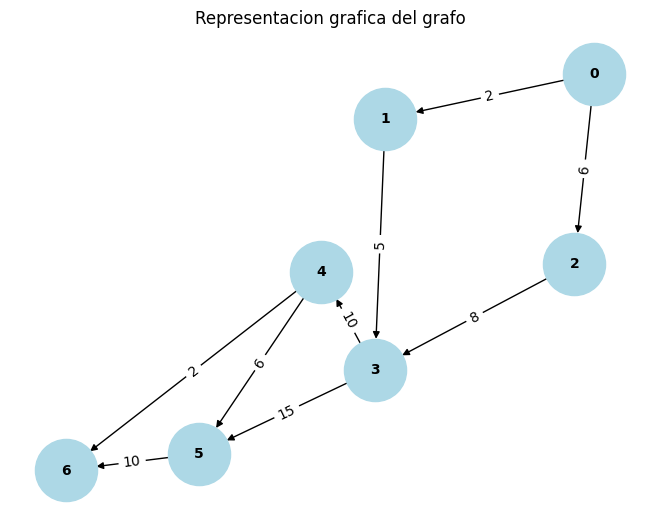

In [19]:
def dijkstra(grafo, nodo_origen):
    #inicializar las distancias mas cortas a infinito
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[nodo_origen] = 0 #Se le indica que la distancia al nodo origen es de 0

    # Cola para determinar la exploracion de nodos
    cola_prioridad = [(0,nodo_origen)]

    # Mientras haya nodos, va a explorar
    while cola_prioridad:
        
        # Obtencion del nodo con menor distancia, por primera vez sabemos que es de 0
        distancia_actual, nodo_actual = heapq.heappop(cola_prioridad)
        #si la distancia actual es mayor a la registrada, continue 
        if distancia_actual > distancias[nodo_actual]:
            continue

        # Explorar los vecinos del nodo actual (Cercanos)
        for vecino, peso in grafo[nodo_actual].items():
            # Calcular la distancia del vecino a traves del nodo actual

            nueva_distancia = distancia_actual + peso

            # Si la nueva distancia es menor que la registrada, actualizar
            if nueva_distancia < distancias[vecino]:
                distancias[vecino] = nueva_distancia
                # Agregar el vecino a la cola de prioridad
                heapq.heappush(cola_prioridad, (nueva_distancia, vecino))
    
    return distancias

def graficar_grafo(grafo):
    # Instancia de la clase para graficar los nodos
    GrafoX = nx.DiGraph()

    # Añadir los nodos y las aristas con pesos
    for nodo, vecinos in grafo.items():
        for vecino, peso in vecinos.items():
            GrafoX.add_edge(nodo, vecino, weight=peso)

    # Obtener las posiciones para la grafica
    pos = nx.spring_layout(GrafoX)

    # Dibujar los nodos y las etiquetas
    nx.draw(GrafoX, pos, with_labels=True, node_color ='lightblue', node_size=2000,
    font_size=10, font_weight='bold')

    #Dibujar las etiquetas de las aristas (pesos)
    labels = nx.get_edge_attributes(GrafoX, 'weight')
    nx.draw_networkx_edge_labels(GrafoX, pos, edge_labels=labels, font_size=10)
    
    # Mostrar la grafica
    plt.title("Representacion grafica del grafo")
    plt.show()

grafo = {
    '0' : {'1':2, '2':6},
    '1' : {'3':5},
    '2' : {'3':8},
    '3' : {'5':15, '4':10},
    '4' : {'5':6, '6':2},
    '5' : {'6':10},
    '6' : {},
}

resultado = dijkstra(grafo, '0')
# Recorrido de la lista resultado
print("Distancia mas corta desde el nodo 0")
for nodo, distancia in resultado.items():
    print(f"Nodo: {nodo} , Distancia: {distancia}")

graficar_grafo(grafo)



